<a href="https://colab.research.google.com/github/torresmateo/redes-neuronales/blob/master/Clase_2/Convoluciones.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Convoluciones 

En este notebook se intenta dar una explicación intuitiva de los filtros convolucionales que se usan en *deep learning*. No se explicará la matemática de las convoluciones, simplemente se darán ejemplos de el tipo de *features* que un filtro convolucional extrae de una imagen, y como esto puede ayudarnos a mejorar la calidad de nuestros modelos.

Antes que nada, importamos las bibliotecas necesarias.



In [1]:
# Se incluyen las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal  # signal nos permite usar una implementación de la convolución bidimensional
import imageio  # esta biblioteca provee acceso rápido a varias imágenes que nos sirven para nuestros ejemplos
plt.style.use('default')

En la siguiente celda, se incluyen funciones útiles para visualizar lo que está ocurriendo con las imágenes. Esto no se explica en los slides, pero es bueno que intentes entender el código en la siguiente celda.

In [2]:
def ver_ejemplo(img, filtro=None, expandir_canales=False, clase=''):
    """
    Visualizar una imágen del dataset

    Parameters
    ----------
    img : np.ndarray
        Una matriz que contiene la imagen a mostrar
    filtro : np.ndarray, opcional
        El filtro convolucional que se aplicará a la imagen.
        Por defecto, no se aplica ningún filtro a la imagen.
    expandir_canales : int
        Además de mostrar la imagen, mostrar los canales 
        individualmente.
    clase : str, opcional
        Si se desea, se puede asignar una clase como título 
        de la imágen.
    """

    def imagen(img, ax, channel='all'):
        chs = ['Rojo', 'Verde', 'Azul']
        t = clase if channel == 'all' else channel
        if channel != 'all':
            n_img = np.zeros(img.shape)
            n_img[:,:,chs.index(channel)] = img[:,:,chs.index(channel)]
        else:
            n_img = img
        ax.set(title=t)
        im = ax.imshow(n_img.astype(int))
        ax.grid(False)
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

    def filtrar(img, filtro):
        n_img = np.zeros(img.shape)
        for i in range(3):
            n_img[:,:,i] = signal.convolve2d(img[:,:,i].astype(int), filtro, boundary='symm', mode='same')
        return n_img

    # determinar la cantidad de ax en la figura
    rows, cols = 1, 1
    if expandir_canales:
        cols += 3
    if filtro is not None:
        rows += 1
        # se aplica la convolución a la imagen
        img_conv = np.absolute(filtrar(img, filtro))
        img_conv = np.interp(img_conv, (img_conv.min(), img_conv.max()), (0, 255))
    fig, axs = plt.subplots(rows, cols, figsize=(5*cols,3*rows), dpi=100)
    #fig, axs = plt.subplots(rows, cols, dpi=100)
    axs.shape = (rows, cols)
    if rows == 1 and cols == 1:
        imagen(img, axs)
    else:
        # if filtro is None:
        #     axs.reshape(axs.shape[0],1)
        # elif not expandir_canales:
        #     print(axs.shape)
        #     axs.reshape(1, axs.shape[0])
        #     print(axs.shape)
        imagen(img, axs[0, 0])
    if expandir_canales:
        imagen(img, axs[0, 1], 'Rojo')
        imagen(img, axs[0, 2], 'Verde')
        imagen(img, axs[0, 3], 'Azul')
    if filtro is not None:
        imagen(img_conv, axs[1,0])
        if expandir_canales:
            imagen(img_conv, axs[1, 1], 'Rojo')
            imagen(img_conv, axs[1, 2], 'Verde')
            imagen(img_conv, axs[1, 3], 'Azul')
    plt.show()

Cargamos una imagen que usaremos para ver el efecto de algunos filtros comunes

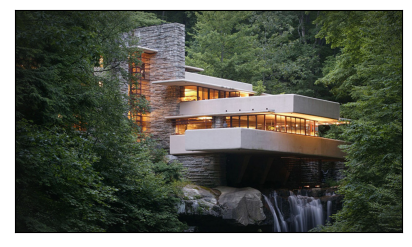

In [9]:
##Estas son algunas imagenes para probar
#https://github.com/torresmateo/penguin-tf-workshop/blob/master/img/house.jpg?raw=true
#https://github.com/Carlosriosch/DeepLearningNotes/blob/master/Convolutions%20And%20Image%20Processing/data/pikrepo%20(1).jpg?raw=true
#https://github.com/Carlosriosch/DeepLearningNotes/blob/master/Convolutions%20And%20Image%20Processing/data/pikrepo%20(2).jpg?raw=true
im = imageio.imread('https://github.com/Carlosriosch/DeepLearningNotes/blob/master/Convolutions%20And%20Image%20Processing/data/Casadelacascada.png?raw=true')
ver_ejemplo(im)

# Algunos filtros

En lo que queda de este notebook, se muestra el efecto de algunos filtros comunes a la foto de arriba.

El primero es un [operador de Scharr](https://en.wikipedia.org/wiki/Sobel_operator#Alternative_operators) que se usa para detectar bordes en las imágenes.

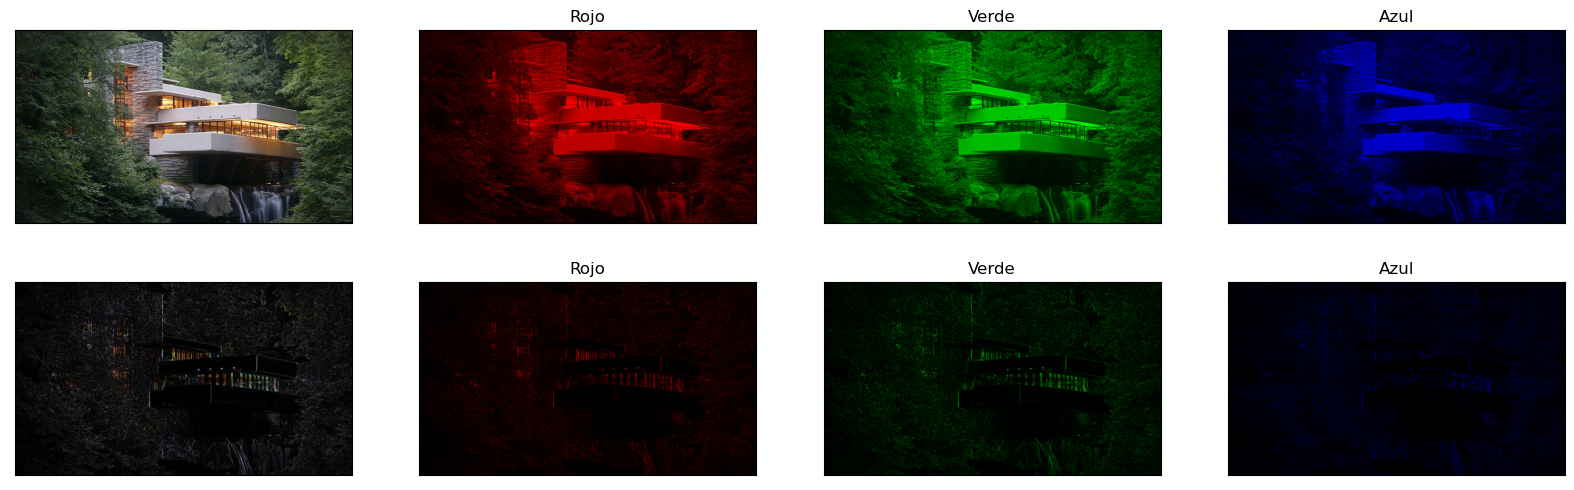

In [10]:
filtro = np.array([[ -3-3j, 0-10j,  +3 -3j],
                   [-10+0j, 0+ 0j, +10 +0j],
                   [ -3+3j, 0+10j,  +3 +3j]])
ver_ejemplo(im, filtro=filtro, expandir_canales=True)

El siguiente es un [operador de Sobel](https://en.wikipedia.org/wiki/Sobel_operator), que se usa para detectar bordes verticales.

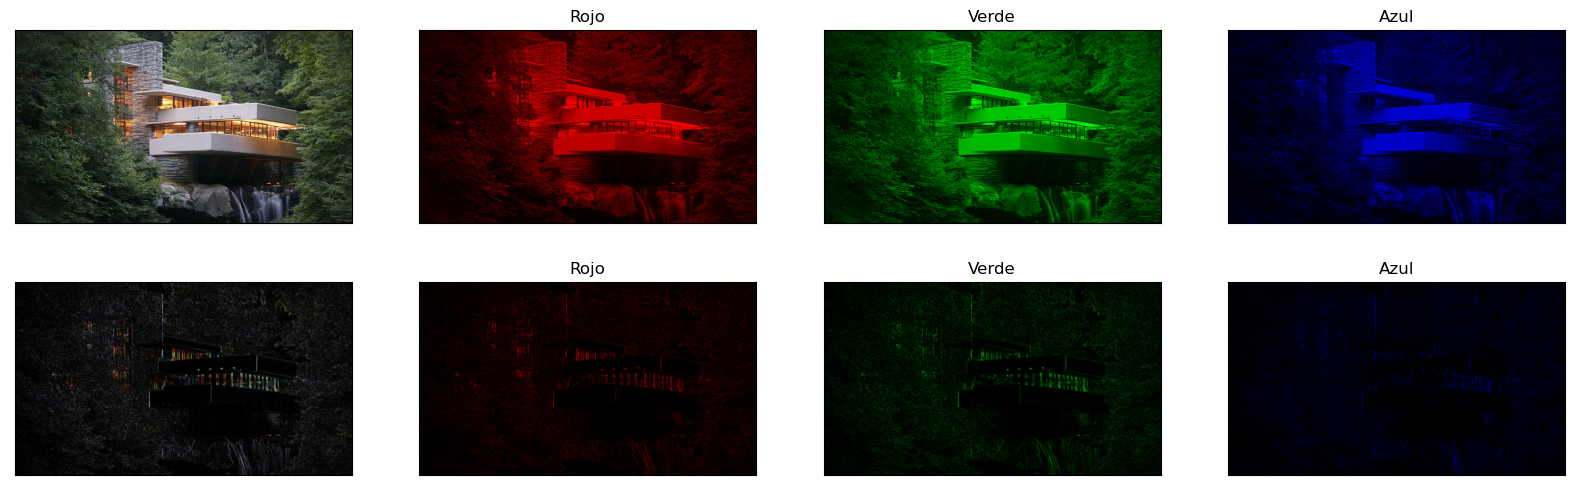

In [11]:
filtro  = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
ver_ejemplo(im, filtro=filtro, expandir_canales=True)

Para detectar bordes horizontales, podemos simplemente transponer el filtro anterior.

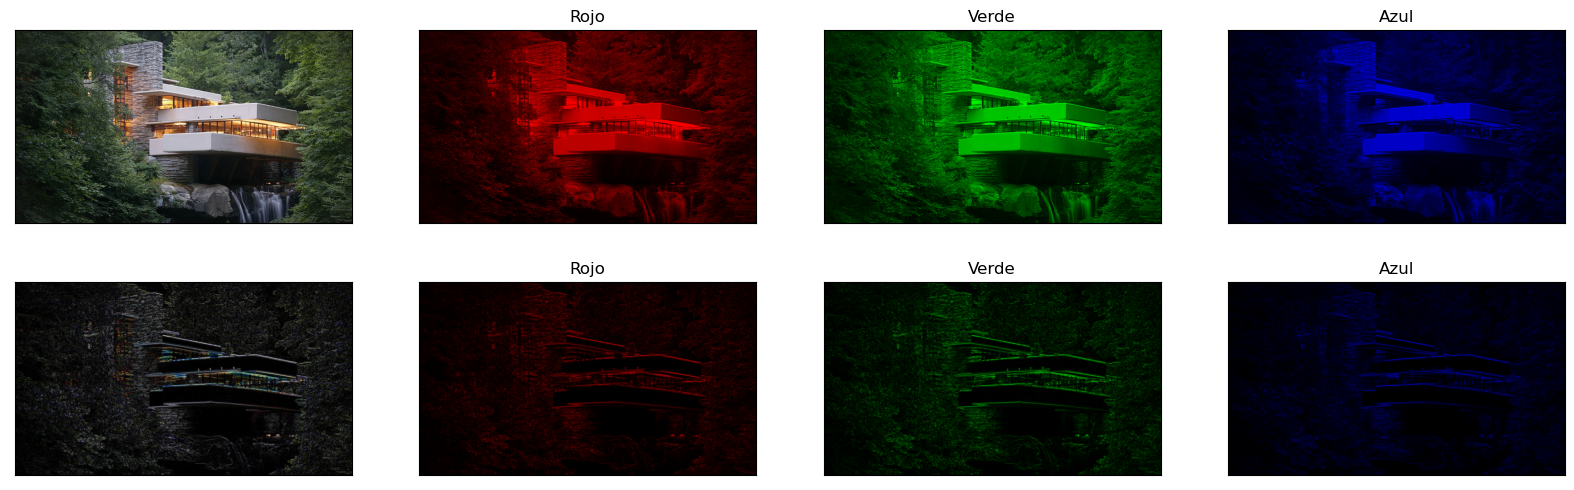

In [12]:
ver_ejemplo(im, filtro=filtro.T, expandir_canales=True)

# Créditos

La [imágen](https://www.pikrepo.com/freeu/blue-and-white-2-storey-house-under-blue-sky) original fue bajada de https://www.pikrepo.com y es royalty-free. 
